# **Preparation**

In [ ]:
import os

In [ ]:
os.getcwd() # get the current working directory

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_folder = '/content/drive/MyDrive/math 6315/Datasets/'
os.chdir(base_folder) # change the current working directory to

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          1.0                         
year           2021                        
month          05                          
day            18                          
svn rev        80317                       
language       R                           
version.string R version 4.1.0 (2021-05-18)
nickname       Camp Pontanezen             


In [ ]:
%%R
library(readxl)
school_code = read_xlsx(
  path = "P20_CODEBOOK -used.xlsx", 
  sheet = "Education-School Codes",
  col_names = TRUE
) 

In [ ]:
%%R
base_name = c("Education", "Detention", "MAYSI", "Offense")

In [ ]:
%%R
library(readr)
eval(parse(text = sprintf('%1$s = read_csv("%2$s.csv")', tolower(base_name), base_name)))
# reference: https://www.gastonsanchez.com/r4strings/c-style-formatting.html

eval(parse(
  text = sprintf(paste("II = rbind(subset(%1$s, select = c(PID, IIBD___, IIGE___, IIRA___)),",
                       "subset(%2$s, select = c(PID, IIBD___, IIGE___, IIRA___)))"), 
                 tolower(base_name)[1], tolower(base_name)[2])
))
eval(parse(
  text = sprintf("II = rbind(II, subset(%1$s, select = c(PID, IIBD___, IIGE___, IIRA___)))", 
                 tolower(base_name)[3: length(base_name)])
))
# replace "M" and "F" by "Male" and "Female" in column gender of all data-frames in base_name
II = unique(II[order(II$PID, II$IIBD___, II$IIGE___, II$IIRA___), ])
II$IIGE___ = ifelse(II$IIGE___ == "M", "Male", 
                    ifelse(II$IIGE___ == "F", "Female", II$IIGE___))
# change ethnicity codes to their own implicit meanings
II$IIRA___ = ifelse(
  II$IIRA___ == "A", "Asian", 
  ifelse(II$IIRA___ == "B", "Black",
         ifelse(II$IIRA___ == "H", "Hispanic",
                ifelse(II$IIRA___ == "W", "White",
                       ifelse(II$IIRA___ == "U", "Unknown", 
                              ifelse(is.na(II$IIRA___), "Missing", II$IIRA___)
                              )
                       )
                )
         )
)
colnames(II) = c("PID", "Birth_Date", "Gender", "Ethnicity")

# remove columns STUDY, PROJECT, IISY___, IIBD___, IIGE___, IIRA___ in all data-frames in base_name
try({
  eval(parse(
    text = sprintf("%1$s = subset(%1$s, select = -c(STUDY, PROJECT, IISY___, IIBD___, IIGE___, IIRA___))", 
                   tolower(base_name))
  ))
}) 

# Remove columns from all data-frames where ALL values are NA in base_name
eval(parse(text = sprintf("%1$s = %1$s[, colSums(is.na(%1$s)) < nrow(%1$s)]", tolower(base_name))))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_logical(),
  STUDY = col_character(),
  PID = col_double(),
  IISY___ = col_double(),
  REFNUM = col_double(),
  IIBD___ = col_datetime(format = ""),
  IIGE___ = col_character(),
  IIRA___ = col_character(),
  JDEDSC_1 = col_character(),
  JDEDID_1 = col_double(),
  JDEDG_1 = col_double(),
  JDEDET_1 = col_character(),
  JDEDGS_1 = col_character(),
  JDEDGR_1 = col_double(),
  JDEDRG_1 = col_double(),
  JDEDPA_1 = col_character(),
  JDEDPG_1 = col_character(),
  JDEDRI_1 = col_character(),
  JDEDAS_1 = col_character(),
  JDEDGA_1 = col_character(),
  JDEDRDC_1 = col_character()
  # ... with 89 more columns
)
ℹ Use `spec()` for the full column specifications.

|===================================================================| 100% 47 MB


R[write to console]: Warning:
R[write to console]:  1308 parsing failures.
  row     col expected actual            file
 5430 JDEDG_2 a double      C 'Education.csv'
10357 JDEDG_1 a double      C 'Education.csv'
12250 JDEDG_1 a double      C 'Education.csv'
13218 JDEDG_4 a double      C 'Education.csv'
14456 JDEDG_5 a double      C 'Education.csv'
..... ....... ........ ...... ...............
See problems(...) for more details.





── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  STUDY = col_character(),
  PROJECT = col_logical(),
  IIBD___ = col_datetime(format = ""),
  IIGE___ = col_character(),
  IIRA___ = col_character(),
  JDDTDD_1 = col_datetime(format = ""),
  JDDTDR_1 = col_datetime(format = ""),
  JDDTDD_2 = col_character(),
  JDDTDR_2 = col_character(),
  JDDTOR_2 = col_logical(),
  JDDTDD_3 = col_character(),
  JDDTDR_3 = col_character(),
  JDDTDD_4 = col_character(),
  JDDTDR_4 = col_character(),
  JDDTDD_5 = col_character(),
  JDDTDR_5 = col_character(),
  JDDTDD_6 = col_character(),
  JDDTDR_6 = col_character(),
  JDDTSN_7 = col_logical(),
  JDDTF_7 = col_logical()
  # ... with 16 more columns
)
ℹ Use `spec()` for the full column specifications.


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_logical(),
  STUDY = col_character(),
  PID = col_double(),
  IISY___ = col_double()

In [ ]:
%%R
education_cut = subset(x = education, select = c(PID, REFNUM, JDEDG_1, JDEDGS_1, JDEDPA_1, JDEDGA_1, JDEDRI_1))
colnames(education_cut) = c("PID", "REFNUM", "ED_grade_level", "ED_grade_status", "ED_participation", "ED_grade_avg", "ED_rule_infraction")

education_cut$ED_participation_f = as.integer( 
  factor(x = education_cut$ED_participation, levels = sort(unique(education_cut$ED_participation))) 
)

education_cut$ED_grade_status_f = as.integer( 
  factor(x = education_cut$ED_grade_status, levels = sort(unique(education_cut$ED_grade_status))) 
)

ED_grade_avg = ifelse(
  education_cut$ED_grade_avg == "A", 5, 
  ifelse(education_cut$ED_grade_avg == "B", 4,
         ifelse(education_cut$ED_grade_avg == "C", 3,
                ifelse(education_cut$ED_grade_avg == "D", 2,
                       ifelse(education_cut$ED_grade_avg == "F", 1, 
                              ifelse(education_cut$ED_grade_avg == "I", 0, education_cut$ED_grade_avg)
                       )
                )
         )
  )
)
education_cut$ED_grade_avg_f = as.integer(ED_grade_avg)

education_cut$ED_rule_infraction_f = ifelse(
  education_cut$ED_rule_infraction == "N", 0,
  ifelse(education_cut$ED_rule_infraction == "F", 1, 
         ifelse(education_cut$ED_rule_infraction == "M", 2, education_cut$ED_rule_infraction)
         )
)

In [ ]:
%%R
offense_cut = subset(
  x = offense, 
  select = c(PID, REFNUM, JDOFOD_1, JDOFOC_1, JDOFNC_1, JDOFND_1, JDOFCT_1, JDOFSL_1)
)
colnames(offense_cut) = c("PID", "REFNUM", "OF_date", "OF_dps_code", 
                          "OF_code", "OF_description", "OF_category",
                          "OF_severity_degree")

offense_cut$OF_description_f = as.integer( 
  factor(x = offense_cut$OF_description, levels = sort(unique(offense_cut$OF_description))) 
)

offense_cut$OF_category_f = as.integer( 
  factor(x = offense_cut$OF_category, levels = sort(unique(offense_cut$OF_category))) 
)

OF_t = table(offense$PID)
OF_ordinal = c(1:OF_t[1], 1:OF_t[2])
eval(parse(text = sprintf("OF_ordinal = c(OF_ordinal, 1:%1$s)", OF_t[3:length(OF_t)])))
offense_cut$OF_ordinal = OF_ordinal

#OF_reoffense = rep(x = "Yep", times = nrow(offense_cut))
#offense_cut$OF_reoffense = replace(x = OF_reoffense, list = cumsum(OF_t), values = "Nope")

In [ ]:
%%R
detention_cut = subset(x = detention, select = c(PID, REFNUM, JDDTDD_1, JDDTDR_1))
colnames(detention_cut) = c("PID", "REFNUM", "DT_enter", "DT_exit")

detention_cut$DT_convict = ifelse(is.na(detention_cut$DT_enter), 0, 1) # 0 means no, 1 means yes

DT_duration = as.integer(difftime(detention_cut$DT_exit, detention_cut$DT_enter, units = "days")) + 1
DT_duration[is.na(DT_duration)] = 0
detention_cut$DT_duration = DT_duration

In [ ]:
%%R
maysi_cut = subset(
  x = maysi, 
  select = c("PID", "REFNUM", "JDMYSD_1", "JDMYA_1", "JDMYAD_1", "JDMYAI_1", 
             "JDMYDA_1", "JDMYSC_1", "JDMYSI_1", "JDMYTD_1", "JDMYTE_1")
)
colnames(maysi_cut) = c("PID", "REFNUM", "MY_date", "MY_administered",
                        "MY_alcohol_drug_use", "MY_angry_irritable", 
                        "MY_depressed_anxiety", "MY_somatic_complaints", 
                        "MY_suicide_ideation", "MY_thought_disturbance_boys", 
                        "MY_traumatic_experiences")

In [ ]:
%%R
library(tidyr)
II$Birth_Date_1 = as.character(II$Birth_Date)
II = separate(II, "Birth_Date_1", c("Birth_Year", "Birth_Month", "Birth_Day"), sep = "-")

df = merge(x = II, y = offense_cut, by = c("PID"), all.y = TRUE)
df = merge(x = df, y = detention_cut, by = c("PID", "REFNUM"), all.x = TRUE)
df = merge(x = df, y = maysi_cut, by = c("PID", "REFNUM"), all.x = TRUE)
df = merge(x = df, y = education_cut, by = c("PID", "REFNUM"), all.x = TRUE)

df$MY_dy_diff = as.integer(difftime(df$MY_date, df$OF_date, units = "days"))



# replace "M" and "F" by 1 and 2 in column gender of all data-frames in base_name
gender = ifelse(df$Gender == "Male", 1, 
                ifelse(df$Gender == "Female", 2, df$Gender))
df$Gender = as.integer(gender)
# change ethnicity codes to 0, 1, 2, 3, 4
ethnicity = ifelse(
  df$Ethnicity == "Asian", 1, 
  ifelse(df$Ethnicity == "Black", 2,
         ifelse(df$Ethnicity == "Hispanic", 3,
                ifelse(df$Ethnicity == "White", 4,
                       ifelse(df$Ethnicity == "Unknown", 0, 
                              ifelse(is.na(df$Ethnicity), 0, df$Ethnicity)
                       )
                )
         )
  )
)
df$Ethnicity = as.integer(ethnicity)

df$MY_administered = ifelse(df$MY_administered == "N" | is.na(df$MY_administered), 0,
                            ifelse(df$MY_administered == "Y", 1, df$MY_administered))

MY_score_col = c("MY_alcohol_drug_use", "MY_angry_irritable", "MY_depressed_anxiety", 
                 "MY_somatic_complaints", "MY_suicide_ideation", "MY_thought_disturbance_boys", 
                 "MY_traumatic_experiences")
df[MY_score_col][is.na(df[MY_score_col])] = -1

df$DT_convict[is.na(df$DT_convict)] = 0
df$DT_duration[is.na(df$DT_duration)] = 0

df = df[-which(is.na(df$Birth_Date) | is.na(df$MY_date) | is.na(df$OF_date)), ]

OF_age = as.integer(format(df$OF_date, "%Y")) - as.integer(format(df$Birth_Date, "%Y")) + 
  sapply(as.integer(format(df$OF_date, "%m%d")) - as.integer(format(df$Birth_Date, "%m%d")), 
         function(x) {if (x < 0) {return(-1)} else {return(0)}})
df$OF_age = 
  OF_age + 
  as.integer(as.Date(df$OF_date) - as.Date(paste0((as.integer(format(df$Birth_Date, "%Y")) + OF_age), 
                                                  "-",format(df$Birth_Date, "%m-%d")))) / ((366 + 365 + 365 + 365) / 4)
df$OF_age = replace(
  x = df$OF_age, 
  list = which(is.na(df$OF_age)),
  values = (OF_age + as.integer(as.Date(df$OF_date) - as.Date(paste0(as.integer(format(df$Birth_Date, "%Y")) + OF_age,
                                                                     "-02-28"))) / ((366 + 365 + 365 + 365) / 4))[which(is.na(df$OF_age))]
)


df$MY_dy_diff = as.integer(difftime(df$MY_date, df$OF_date, units = "days"))


MY_age = as.integer(format(df$MY_date, "%Y")) - as.integer(format(df$Birth_Date, "%Y")) + 
  sapply(as.integer(format(df$MY_date, "%m%d")) - as.integer(format(df$Birth_Date, "%m%d")), 
         function(x) {if (x < 0) {return(-1)} else {return(0)}})
df$MY_age = 
  MY_age + 
  as.integer(as.Date(df$MY_date) - as.Date(paste0((as.integer(format(df$Birth_Date, "%Y")) + MY_age), 
                                                  "-",format(df$Birth_Date, "%m-%d")))) / ((366 + 365 + 365 + 365) / 4)
df$MY_age = replace(
  x = df$MY_age, 
  list = which(is.na(df$MY_age)),
  values = (MY_age + as.integer(as.Date(df$MY_date) - as.Date(paste0(as.integer(format(df$Birth_Date, "%Y")) + MY_age,
                                                                     "-02-28"))) / ((366 + 365 + 365 + 365) / 4))[which(is.na(df$MY_age))]
)

# https://www.thetexasattorney.com/juvenile-criminal-defense/#:~:text=The%20state%20of%20Texas%20falls,capacity%20to%20have%20criminal%20intent.
df = df[which(df$Ethnicity != 0 & df$OF_age >= 10 & df$OF_age <= 17), ]

OF_reoffense = rep(x = "Yep", times = nrow(df))
df$OF_reoffense = replace(x = OF_reoffense, list = cumsum(table(df$PID)), values = "Nope")

OF_t = table(df$PID)
OF_ordinal = c(1:OF_t[1], 1:OF_t[2])
eval(parse(text = sprintf("OF_ordinal = c(OF_ordinal, 1:%1$s)", OF_t[3:length(OF_t)])))
df$OF_ordinal = OF_ordinal

#df = df[which(df$Birth_Year >= 1990 & df$Birth_Year <= 2004), ]
#df = df[which(df$Birth_Year >= 1990), ]

df_a = subset(
  x = df, 
  select = c("PID", "OF_reoffense", 
             "Birth_Year", 
             "Birth_Month", "Birth_Day", 
             "Gender", "Ethnicity", "OF_age", 
             "OF_description_f", 
             "OF_category_f", "OF_severity_degree", 
             "OF_ordinal", 
             "DT_convict", "DT_duration",
             "MY_dy_diff",
             "MY_age", 
             "MY_administered", "MY_alcohol_drug_use", "MY_angry_irritable", "MY_depressed_anxiety", 
             "MY_somatic_complaints", "MY_suicide_ideation", "MY_thought_disturbance_boys", 
             "MY_traumatic_experiences")
)

#df_a = df_a[-which(df_a$PID %in% unique(df_a[which(df_a$MY_dy_diff > 365 | df$MY_dy_diff < 0), "PID"])), ]

df_a = df_a[-which(df_a$DT_convict == 1 & df_a$DT_duration <= 0), ]

#df_a = df_a[which(df_a$MY_dy_diff <= 365 & df$MY_dy_diff >= 0), ]
#df_a = df_a[which(abs(df_a$MY_dy_diff) <= 60), ]
df_a = df_a[which(df_a$MY_dy_diff <= 180 & df_a$MY_dy_diff >= 0), ]

df_a = subset(df_a, select = -c(MY_dy_diff))

df_a = na.omit(df_a)


In [ ]:
%%R
print( table(df_a$OF_reoffense) )
print( min(table(df_a$OF_reoffense)) / sum(table(df_a$OF_reoffense)) )


 Nope   Yep 
49050 34448 
[1] 0.4125608


In [ ]:
%%R
## Handling Class Imblance
#eval(parse(text = sprintf("num_CL%1$s = table(df_a$OF_reoffense)[%1$s]", 1: length( unique(df_a$OF_reoffense) ))))

#max_num_CL = as.integer(max(table(df_a$OF_reoffense)))

#eval(parse(
#    text = sprintf("pd_CL%1$s = sample(x = max_num_CL - as.integer(max_num_CL / num_CL%1$s) * num_CL%1$s, size = max_num_CL - as.integer(max_num_CL / num_CL%1$s) * num_CL%1$s, replace = FALSE)", 1: length(unique(df_a$OF_reoffense)))
#))

#eval(parse(text = sprintf("CL%1$s = subset(df_a, OF_reoffense == dimnames(table(df_a$OF_reoffense))[[1]][%1$s])",  1: length(unique(df_a$OF_reoffense)))))

#eval(parse(text = sprintf("df_a = rbind(df_a, CL%1$s[rep(c(1:nrow(CL%1$s)), times = as.integer(max_num_CL / num_CL%1$s) - 1), ])",  1: length(unique(df_a$OF_reoffense)))))
#eval(parse(text = sprintf("df_a = rbind(df_a, CL%1$s[pd_CL%1$s, ])",  1: length(unique(df_a$OF_reoffense)))))



NULL


In [ ]:
%%R
names(df_a)[names(df_a) == 'OF_reoffense'] = 'JDOF_reoffense'

names(df_a)[names(df_a) == 'Birth_Year'] = 'IIBY___'
names(df_a)[names(df_a) == 'Birth_Month'] = 'IIBM___'
names(df_a)[names(df_a) == 'Birth_Day'] = 'IIBD___'
names(df_a)[names(df_a) == 'Gender'] = 'IIGE___'
names(df_a)[names(df_a) == 'Ethnicity'] = 'IIRA___'

names(df_a)[names(df_a) == 'OF_age'] = 'JDOF_age'
names(df_a)[names(df_a) == 'OF_description_f'] = 'JDOFND'
names(df_a)[names(df_a) == 'OF_category_f'] = 'JDOFCT'
names(df_a)[names(df_a) == 'OF_severity_degree'] = 'JDOFSL'
names(df_a)[names(df_a) == 'OF_ordinal'] = 'JDOF_ordinal'

names(df_a)[names(df_a) == 'DT_convict'] = 'JDDT_convict'
names(df_a)[names(df_a) == 'DT_duration'] = 'JDDT_duration'
 
names(df_a)[names(df_a) == 'MY_age'] = 'JDMY_age' 
names(df_a)[names(df_a) == 'MY_administered'] = 'JDMYA'
names(df_a)[names(df_a) == 'MY_alcohol_drug_use'] = 'JDMYAD'
names(df_a)[names(df_a) == 'MY_angry_irritable'] = 'JDMYAI'
names(df_a)[names(df_a) == 'MY_depressed_anxiety'] = 'JDMYDA'
names(df_a)[names(df_a) == 'MY_somatic_complaints'] = 'JDMYSC'
names(df_a)[names(df_a) == 'MY_suicide_ideation'] = 'JDMYSI'
names(df_a)[names(df_a) == 'MY_thought_disturbance_boys'] = 'JDMYTD'
names(df_a)[names(df_a) == 'MY_traumatic_experiences'] = 'JDMYTE'

In [ ]:
%%R
write.csv(df_a, "df_a.csv", row.names = FALSE)

In [ ]:
%%R
df_a = df_a[, -which(names(df_a) == 'JDOF_reoffense')]
df_a = df_a[, -which(names(df_a) == 'PID')]

eval(parse(text = sprintf('df_a$%1$s = as.numeric(df_a$%1$s)', colnames(df_a))))

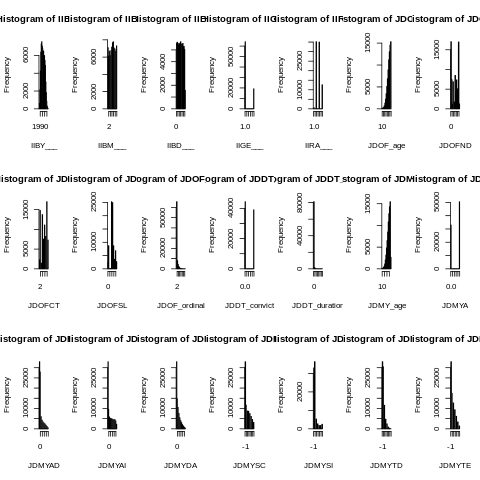

In [ ]:
%%R
par(mfrow = c(ceiling(ncol(df_a) / 7), 7))
eval(parse(text = sprintf('hist(df_a$%1$s, xlab = "%1$s", main = "Histogram of %1$s")', colnames(df_a))))

In [ ]:
##%%capture is used to suppress output only in this cell 
%%capture 
%%R
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

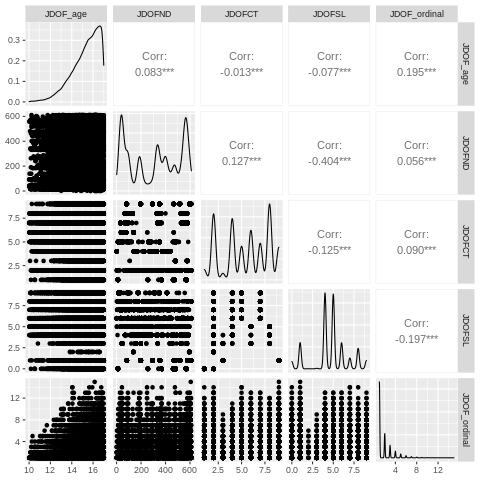

In [ ]:
%%R
df_OF = df_a[, which(colnames(df_a) == 'JDOF_age'): which(colnames(df_a) == 'JDOF_ordinal')]
ggpairs(data = df_OF, columns = 1: ncol(df_OF))

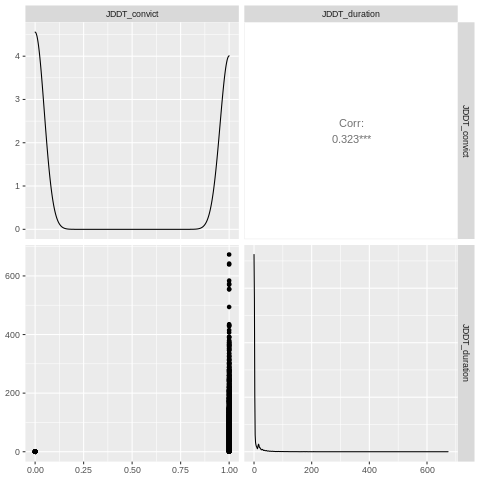

In [ ]:
%%R
df_DT = df_a[, which(colnames(df_a) == 'JDDT_convict'): which(colnames(df_a) == 'JDDT_duration')]
ggpairs(data = df_DT, columns = 1: ncol(df_DT))

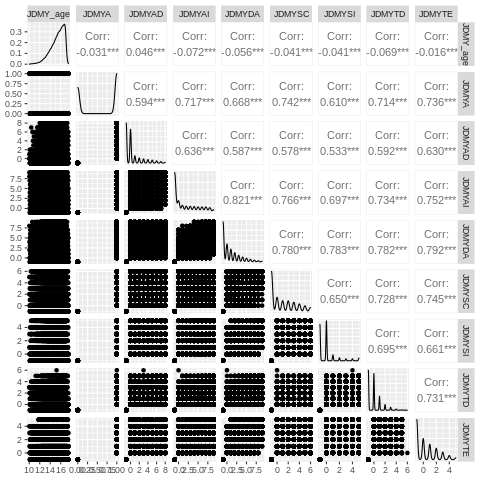

In [ ]:
%%R
df_MY = df_a[, which(colnames(df_a) == 'JDMY_age'): which(colnames(df_a) == 'JDMYTE')]
ggpairs(data = df_MY, columns = 1: ncol(df_MY))

# **MLP**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
base_folder = '/content/drive/MyDrive/math 6315/Datasets/'
os.chdir(base_folder) # change the current working directory to

base_name = ['df_a']

for value in base_name:
     exec("{x} = pd.read_csv(f'{x}.csv')".format(x = value))

df_a

,PID,JDOF_reoffense,IIBY___,IIBM___,IIBD___,IIGE___,IIRA___,JDOF_age,JDOFND,JDOFCT,JDOFSL,JDOF_ordinal,JDDT_convict,JDDT_duration,JDMY_age,JDMYA,JDMYAD,JDMYAI,JDMYDA,JDMYSC,JDMYSI,JDMYTD,JDMYTE
0,1578461,Nope,1990,3,1,1,4,16.766598,92,7,8,1,0,0,16.895277,1,0,0,0,2,0,0,0
1,1583858,Nope,1990,9,12,1,3,15.725530,49,6,5,1,1,2,15.725530,1,3,2,2,1,0,0,0
2,1585839,Yep,1991,3,4,1,3,16.714579,572,8,4,1,0,0,16.933607,1,2,5,3,4,4,0,1
3,1585839,Nope,1991,3,4,1,3,16.952772,196,9,1,2,1,28,17.098563,1,0,0,0,0,0,0,0
4,1595211,Yep,1991,10,1,1,2,14.980151,329,4,4,1,0,0,15.177960,1,0,3,1,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83493,1681322,Nope,2008,8,8,1,4,10.791239,24,5,8,1,1,1,10.807666,1,0,6,3,1,0,1,3
83494,1681325,Nope,2003,10,16,1,4,15.618754,49,6,5,1,1,2,15.618754,1,2,9,3,4,1,1,1
83495,1681326,Nope,2003,5,28,2,2,16.005476,521,2,4,1,1,2,16.005476,1,7,2,7,5,2,1,5
83496,1681327,Nope,2005,1,23,2,2,14.347707,40,6,5,1,1,1,14.350445,1,4,7,5,3,5,2,2


In [ ]:
class_type = ['Yep', 'Nope']

In [ ]:
def output(n , k = class_type):
  a = (np.zeros([1, len(k)]))
  a[0, n - 1] = 1
  return a

In [ ]:
np.random.seed(123)

for index, value in enumerate(class_type):
  exec("CL{x} = df_a[df_a['JDOF_reoffense'] == '{y}']".format(x = index + 1, y = value))
  exec("X_CL{x} = CL{x}.drop(['PID', 'JDOF_reoffense'], axis = 'columns', inplace = False).astype(float)".format(x = index + 1))
  exec('Y_CL{x} = np.repeat(a = output({x}), repeats = len(CL{x}.index), axis = 0)'.format(x = index + 1))
  exec('pd_CL{x} = np.random.choice(a = 2, size = len(CL{x}.index), replace = True, p = [0.70, 0.30])'.format(x = index + 1))
  exec('train_CL{x} = CL{x}.loc[pd_CL{x} == 0]'.format(x = index + 1))
  exec('test_CL{x} = CL{x}.loc[pd_CL{x} == 1]'.format(x = index + 1))
  exec('Y_train_CL{x} = Y_CL{x}[1: (train_CL{x}.shape[0] + 1), :]'.format(x = index + 1))
  exec('Y_test_CL{x} = Y_CL{x}[1: (test_CL{x}.shape[0] + 1), :]'.format(x = index + 1))

In [ ]:
for value in ['train', 'test']:
  exec("X_{x} = pd.concat([{x}_CL1, {x}_CL2], axis = 0).drop(['PID', 'JDOF_reoffense'], axis = 'columns', inplace = False)".format(x = value))
  exec("y_{x} = pd.concat([{x}_CL1, {x}_CL2], axis = 0).loc[:, 'JDOF_reoffense']".format(x = value))
  exec('Y_{x} = np.concatenate([Y_{x}_CL1, Y_{x}_CL2], axis = 0)'.format(x = value))

# np.random.seed(123)
pd_X_train = np.random.choice(X_train.shape[0], size = X_train.shape[0], replace = False, p = None)
X_train = np.array(X_train.iloc[pd_X_train, ])
Y_train = Y_train[pd_X_train]

pd_X_test = np.random.choice(X_test.shape[0], size = X_test.shape[0], replace = False, p = None)
X_test = np.array(X_test.iloc[pd_X_test, ])
Y_test = Y_test[pd_X_test]

In [ ]:
X_train

array([[ 1.996e+03,  1.000e+00,  1.500e+01, ...,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.989e+03,  1.100e+01,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.997e+03,  1.000e+00,  1.500e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 2.001e+03,  9.000e+00,  2.700e+01, ...,  1.000e+00,  1.000e+00,
         2.000e+00],
       [ 1.994e+03,  5.000e+00,  2.400e+01, ...,  0.000e+00,  0.000e+00,
         2.000e+00],
       [ 1.994e+03,  3.000e+00,  3.000e+01, ...,  1.000e+00,  1.000e+00,
         2.000e+00]])

In [ ]:
print(Y_train.shape, Y_test.shape)
print(train_CL1.shape, train_CL2.shape)
print(Y_train_CL1.shape, Y_train_CL2.shape)
print(test_CL1.shape, test_CL2.shape)
print(Y_test_CL1.shape, Y_test_CL2.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, y_test.shape)

(58359, 2) (25139, 2)
(24146, 23) (34213, 23)
(24146, 2) (34213, 2)
(10302, 23) (14837, 23)
(10302, 2) (14837, 2)
(58359, 21) (25139, 21) (58359, 2) (25139, 2) (25139,)


In [ ]:
X = pd.concat([CL1, CL2], axis = 0).drop(['PID', 'JDOF_reoffense'], axis = 'columns', inplace = False)
X

,IIBY___,IIBM___,IIBD___,IIGE___,IIRA___,JDOF_age,JDOFND,JDOFCT,JDOFSL,JDOF_ordinal,JDDT_convict,JDDT_duration,JDMY_age,JDMYA,JDMYAD,JDMYAI,JDMYDA,JDMYSC,JDMYSI,JDMYTD,JDMYTE
2,1991,3,4,1,3,16.714579,572,8,4,1,0,0,16.933607,1,2,5,3,4,4,0,1
4,1991,10,1,1,2,14.980151,329,4,4,1,0,0,15.177960,1,0,3,1,3,1,0,3
5,1991,10,1,1,2,15.405202,602,9,1,2,1,15,15.662560,0,-1,-1,-1,-1,-1,-1,-1
6,1992,2,22,1,3,14.687201,232,2,6,1,1,2,14.687201,1,0,0,1,1,0,0,0
7,1992,2,22,1,3,14.769336,521,2,4,2,0,0,14.772074,1,0,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83493,2008,8,8,1,4,10.791239,24,5,8,1,1,1,10.807666,1,0,6,3,1,0,1,3
83494,2003,10,16,1,4,15.618754,49,6,5,1,1,2,15.618754,1,2,9,3,4,1,1,1
83495,2003,5,28,2,2,16.005476,521,2,4,1,1,2,16.005476,1,7,2,7,5,2,1,5
83496,2005,1,23,2,2,14.347707,40,6,5,1,1,1,14.350445,1,4,7,5,3,5,2,2


In [ ]:
y = pd.concat([CL1, CL2], axis = 0).loc[:, 'JDOF_reoffense']
y

2         Yep
4         Yep
5         Yep
6         Yep
7         Yep
         ... 
83493    Nope
83494    Nope
83495    Nope
83496    Nope
83497    Nope
Name: JDOF_reoffense, Length: 83498, dtype: object

In [ ]:
Y = pd.DataFrame(np.concatenate([Y_CL1, Y_CL2], axis = 0))
print(len(Y))
np.array(Y)

83498


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
## split data set into a training set (80%) and a test set (20%)
#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(X_train)
X_train, X_test = std_scaler.transform(X_train), std_scaler.transform(X_test)

In [ ]:
from sklearn import *

In [ ]:
def x_pca(df, prop):
  # standardized dataset
  SX = preprocessing.scale(df) # from sklearn package
  # correlation matrix using method of pearson (standard correlation coefficient)
  R = df.corr(method = 'pearson').to_numpy()
  # D refers to eigenvalues, and W refers to eigenvectors
  D, Q = np.linalg.eig(R)
  s = abs(np.cumsum(D)/sum(D) - prop)
  p = s.tolist().index(sorted(s, reverse = False)[0]) + 1
  V = Q[:,0:p]
  X_pca = pd.DataFrame(data = np.dot(SX, V), # SX.dot(V)
                       index = df.index)
  return X_pca

In [ ]:
X_pca = x_pca(X, 0.95)
pc0 = X_pca.shape[1]
for index, value in enumerate(class_type):
  exec('X_CL{x}_pca = x_pca(X_CL{x}, 0.99)'.format(x = index + 1))
  exec('pc{x} = X_CL{x}_pca.shape[1]'.format(x = index + 1))

In [ ]:
h0, h1, h2 = pc0, pc1, pc2
hmin, hmax = h0, sum([h1, h2])
n_h0, n_hstar = hmin, hmax
print(n_h0)
print(n_hstar)

17
40


In [ ]:
n_input, n_output = len(X.columns), len(class_type)

In [ ]:
print(n_input, n_output)

21 2


In [ ]:
n_batch = int((X_train.shape[0])**0.5)
n_batch

241

In [ ]:
n_epoch = 200
n_epoch

200

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers

In [ ]:
import datetime as dt
file_dir = "best_model_" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")

n_hidden = [n_hstar]
for index, value in enumerate(n_hidden):

  exec('model_{y} = Sequential()'.format(y = index + 1))

  exec('model_{y}.add(keras.layers.InputLayer(input_shape = n_input))'.format(y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.4) )'.format(y = index + 1))

  exec("model_{y}.add(Dense(units = {x}, activation = 'relu', kernel_initializer = 'he_normal'))".format(x = value, y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.4) )'.format(y = index + 1))

  exec("model_{y}.add(Dense(units = n_input * 2 // 3 + n_output, activation = 'sigmoid', kernel_initializer = 'he_normal'))".format(x = value, y = index + 1))

  exec('model_{y}.add( keras.layers.Dropout(rate = 0.2) )'.format(y = index + 1))
  
  exec('model_{y}.add(Dense(units = n_output))'.format(y = index + 1))

  exec("model_{y}.add(Activation('softmax'))".format(y = index + 1))

  from tensorflow.keras import optimizers, losses
  opt = optimizers.Adam(learning_rate = 1e-3, decay = 1e-7)
  #opt = optimizers.Adam()
  loss_fn = losses.CategoricalCrossentropy()

  exec("model_{y}.compile(loss = loss_fn, optimizer = opt, metrics = ['accuracy'])".format(y = index + 1))

  from tensorflow.keras.callbacks import ModelCheckpoint
  exec("checkpointer_{y} = ModelCheckpoint(filepath = file_dir, monitor = 'val_accuracy', save_best_only = True)".format(y = index + 1)) 

  from tensorflow.keras import callbacks
  # for recording training loss over the whole training set at the end of each epoch
  class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs = None):
      self.gradient = []
      self.gradsNorm = []
      self.batch_loss = []
      self.epoch_loss = []
      self.epoch_accuracy = [] 
    def on_epoch_end(self, epoch, logs = None):
      with tf.GradientTape() as tape:
        exec('Y_batch_pred_{y} = model_{y}(X_train, training = True)'.format(y = index + 1))
        exec('loss_val_{y} = loss_fn(Y_train,Y_batch_pred_{y})'.format(y = index + 1))
      exec('grads_{y} = tape.gradient(loss_val_{y}, model_{y}.trainable_weights)'.format(y = index + 1))
      exec('self.gradsNorm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grads_{y}])))'.format(y = index + 1))
      exec('self.gradient.append(grads_{y})'.format(y = index + 1))
      exec('self.batch_loss.append(loss_val_{y}.numpy())'.format(y = index + 1))
      exec('epoch_loss_value_{y} = model_{y}.evaluate(X_train, Y_train, verbose = 1)[0]'.format(y = index + 1))
      exec('self.epoch_loss.append(epoch_loss_value_{y})'.format(y = index + 1))
      exec('epoch_accuracy_value_{y} = model_{y}.evaluate(X_train, Y_train, verbose = 0)[1]'.format(y = index + 1))
      exec('self.epoch_accuracy.append(epoch_accuracy_value_{y})'.format(y = index + 1))
  exec("MyMonitor_{y} = MyHistory()".format(y = index + 1))

  exec('Monitor_{y} = model_{y}.fit(x = X_train, y = Y_train, batch_size = n_batch, epochs = n_epoch, validation_data = (X_test, Y_test), callbacks = [checkpointer_{y}, MyMonitor_{y}], shuffle = True)'.format(y = index + 1))

  from tensorflow.keras.models import load_model
  exec("trained_model_{y} = load_model(file_dir)".format(y = index + 1))

  exec('Y_pred_train_{y} = trained_model_{y}.predict(X_train)'.format(y = index + 1))
  exec('Y_pred_test_{y} = trained_model_{y}.predict(X_test)'.format(y = index + 1))

  exec('Ylabel_train_{y} = np.argmax(np.array(Y_train), axis = 1)'.format(y = index + 1))
  exec('Ylabel_test_{y} = np.argmax(np.array(Y_test), axis = 1)'.format(y = index + 1))

  exec('Ypredlabel_train_{y} = np.argmax(Y_pred_train_{y}, axis = 1)'.format(y = index + 1))
  exec('Ypredlabel_test_{y} = np.argmax(Y_pred_test_{y}, axis = 1)'.format(y = index + 1))

  exec('training_loss_{y} = MyMonitor_{y}.epoch_loss'.format(y = index + 1))
  exec("validation_loss_{y} = Monitor_{y}.history['val_loss']".format(y = index + 1))
  exec('batch_loss_{y} = MyMonitor_{y}.batch_loss'.format(y = index + 1))
  exec('training_accuracy_{y} = MyMonitor_{y}.epoch_accuracy'.format(y = index + 1))
  exec("validation_accuracy_{y} = Monitor_{y}.history['val_accuracy']".format(y = index + 1))
  exec("grads_N_{y} = MyMonitor_{y}.gradsNorm".format(y = index + 1))

  exec('last_epoch = len(pd.DataFrame(Monitor_{y}.history).index)'.format(y = index + 1))

  from sklearn import svm, datasets
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import confusion_matrix
  from sklearn.utils.multiclass import unique_labels
  exec('cm_train_{y} = confusion_matrix(Ylabel_train_{y}, Ypredlabel_train_{y})'.format(y = index + 1))
  exec('cm_test_{y} = confusion_matrix(Ylabel_test_{y}, Ypredlabel_test_{y})'.format(y = index + 1)) 

  exec('trainperf_{y} = np.sum(np.diag(cm_train_{y})) / np.sum(cm_train_{y})'.format(y = index + 1)) # total percentage of correct classifications for train set
  exec('testperf_{y} = np.sum(np.diag(cm_test_{y})) / np.sum(cm_test_{y})'.format(y = index + 1)) # total percentage of correct classifications for test set

for index, value in enumerate(n_hidden):
  exec("monitor_{y} = pd.concat([pd.DataFrame(training_loss_{y}, columns = ['train_loss']), pd.DataFrame(validation_loss_{y}, columns = ['val_loss']), pd.DataFrame(training_accuracy_{y}, columns = ['train_accuracy']), pd.DataFrame(validation_accuracy_{y}, columns = ['val_accuracy'])], axis = 1)".format(y = index + 1))
  exec("monitor_{y}.to_csv(base_folder + file_dir + '/monitor_{y}.csv')".format(y = index + 1))


for j in ['X', 'Y']:
  for i in ['train', 'test']:
    exec("pd.DataFrame({y}_{x}).to_csv(base_folder + file_dir + '/{y}_{x}.csv', index = False)".format(x = i, y = j))

Epoch 1/200
243/243 [==============================] - 2s 4ms/step - loss: 0.6807 - accuracy: 0.5860 - val_loss: 0.6135 - val_accuracy: 0.6672
INFO:tensorflow:Assets written to: best_model_20210723-223457/assets
1824/1824 [==============================] - 3s 2ms/step - loss: 0.6128 - accuracy: 0.6680
Epoch 2/200
243/243 [==============================] - 1s 3ms/step - loss: 0.6450 - accuracy: 0.6242 - val_loss: 0.5985 - val_accuracy: 0.6794
INFO:tensorflow:Assets written to: best_model_20210723-223457/assets
1824/1824 [==============================] - 3s 2ms/step - loss: 0.5976 - accuracy: 0.6828
Epoch 3/200
243/243 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.6321 - val_loss: 0.5947 - val_accuracy: 0.6852
INFO:tensorflow:Assets written to: best_model_20210723-223457/assets
1824/1824 [==============================] - 3s 2ms/step - loss: 0.5938 - accuracy: 0.6890
Epoch 4/200
243/243 [==============================] - 1s 3ms/step - loss: 0.6300 - accurac

In [ ]:
#base_folder_1 = '/content/drive/MyDrive/math 6315/Datasets/' + 'best_model_20210721-013404/' 
#base_folder_1 = '/content/drive/MyDrive/math 6315/Datasets/' + 'best_model_20210722-053738/' 
#base_folder_1 = '/content/drive/MyDrive/math 6315/Datasets/' + 'best_model_20210723-223457/'
base_folder_1 = '/content/drive/MyDrive/math 6315/Datasets/' + file_dir + '/'
base_folder_1

os.chdir(base_folder_1)

In [ ]:
for j in ['X', 'Y']:
  for i in ['train', 'test']:
    exec("{y}_{x} = pd.read_csv('{y}_{x}.csv')".format(x = i, y = j))

In [ ]:
from tensorflow.keras.models import load_model
trained_model_1 = load_model(base_folder_1)
monitor_1 = pd.read_csv('monitor_1.csv')

In [ ]:
trained_model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 40)                880       
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                656       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation (Activation)      (None, 2)                 0

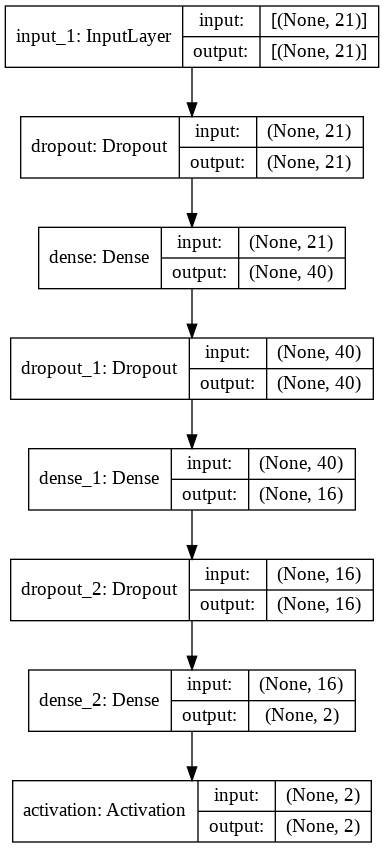

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = trained_model_1, show_shapes = True, show_layer_names = True)

In [ ]:
import matplotlib.pyplot as plt

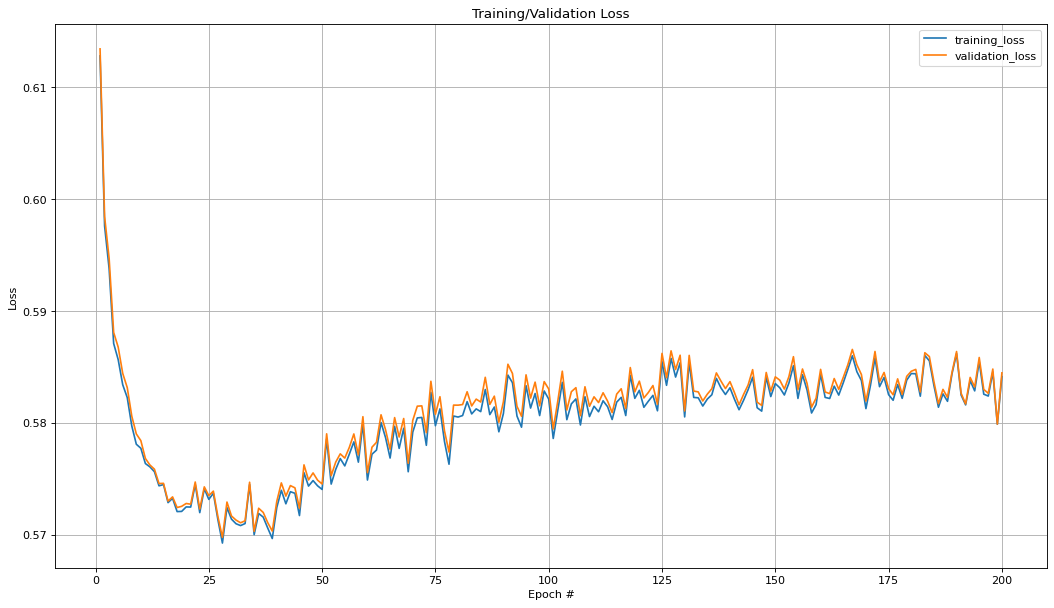

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['train_loss'],
    label = 'training_loss'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['val_loss'],
    label = 'validation_loss'
)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title(f'Training/Validation Loss')
plt.legend() 
# axes = plt.gca()
# axes.set_ylim([0, np.max(mse.iloc[10:,].to_numpy())])
plt.grid()
plt.show()

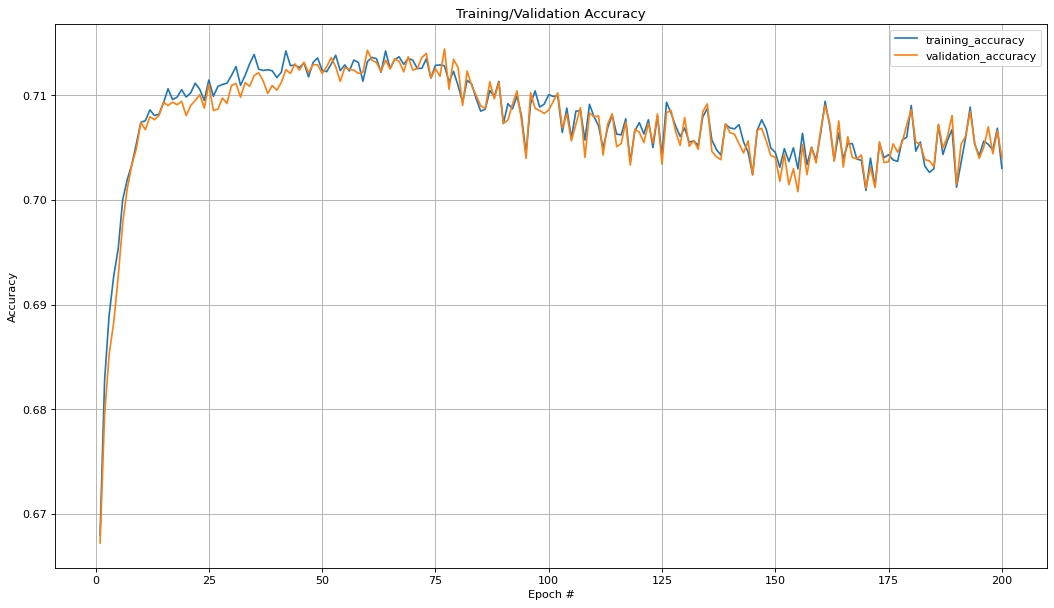

In [ ]:
plt.figure(figsize = (16, 9), dpi = 80)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['train_accuracy'],
    label = 'training_accuracy'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['val_accuracy'],
    label = 'validation_accuracy'
)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.title(f'Training/Validation Accuracy')
plt.legend() 
plt.grid()
plt.show()

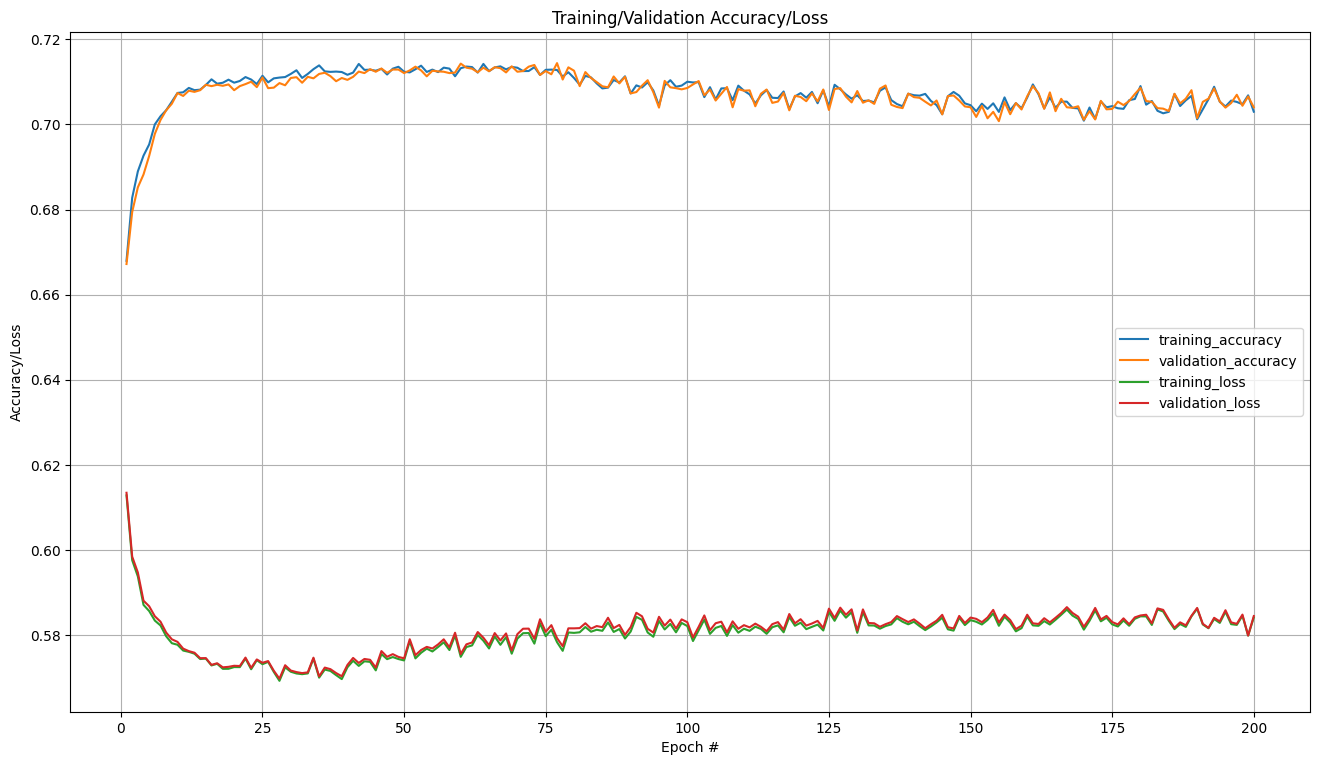

In [ ]:
plt.figure(figsize = (16, 9), dpi = 100)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['train_accuracy'],
    label = 'training_accuracy'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['val_accuracy'],
    label = 'validation_accuracy'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['train_loss'],
    label = 'training_loss'
)
plt.plot(
    np.arange(1, last_epoch + 1, 1), 
    monitor_1['val_loss'],
    label = 'validation_loss'
)
plt.xlabel('Epoch #')
plt.ylabel('Accuracy/Loss')
plt.title(f'Training/Validation Accuracy/Loss')
plt.legend() 
plt.grid()
plt.show()

In [ ]:
best_epoch_1 = monitor_1.iloc[monitor_1['val_accuracy'].idxmax(), ]

In [ ]:
train_perf_1 = best_epoch_1['train_accuracy']
train_perf_1

0.7128120660781859

In [ ]:
test_perf_1 = best_epoch_1['val_accuracy']
test_perf_1

0.7144277691841125

In [ ]:
train_loss_1 = best_epoch_1['train_loss']
train_loss_1

0.5783394575119019

In [ ]:
test_loss_1 = best_epoch_1['val_loss']
test_loss_1

0.5792912244796753

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize = False, title = None, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize = (16,8))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap, vmin = 0, vmax = 1)
    ax.figure.colorbar(im, ax = ax)
    # We want to show all ticks...
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels = classes, yticklabels = classes,
           title = title,
           ylabel = 'True label',
           xlabel = 'Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation = 45, ha = "right",
             rotation_mode = "anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
Y_pred_train_1 = trained_model_1.predict(X_train)
Y_pred_test_1 = trained_model_1.predict(X_test)

Ylabel_train_1 = np.argmax(np.array(Y_train), axis = 1)
Ylabel_test_1 = np.argmax(np.array(Y_test), axis = 1)

Ypredlabel_train_1 = np.argmax(Y_pred_train_1, axis = 1)
Ypredlabel_test_1 = np.argmax(Y_pred_test_1, axis = 1)

In [ ]:
classes = np.array(list(range( len(Y_train.columns) )))
classes

array([0, 1])

Normalized confusion matrix
[[0.58502443 0.41497557]
 [0.19700114 0.80299886]]


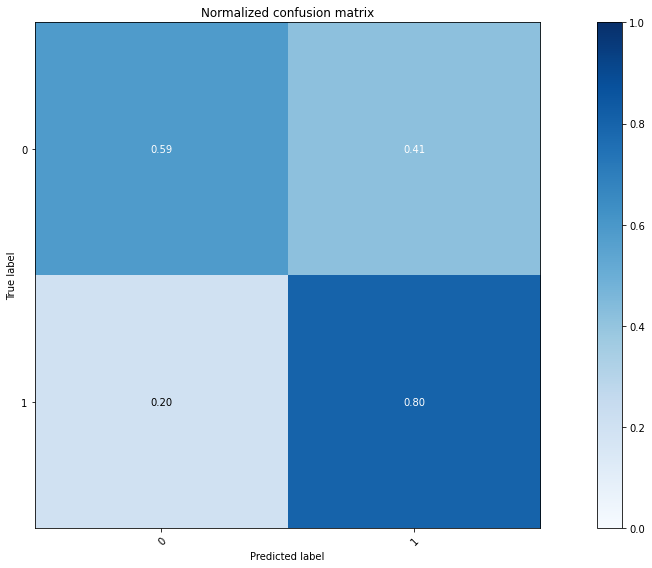

In [ ]:
plot_confusion_matrix(Ylabel_train_1, Ypredlabel_train_1, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

Normalized confusion matrix
[[0.58076102 0.41923898]
 [0.19276134 0.80723866]]


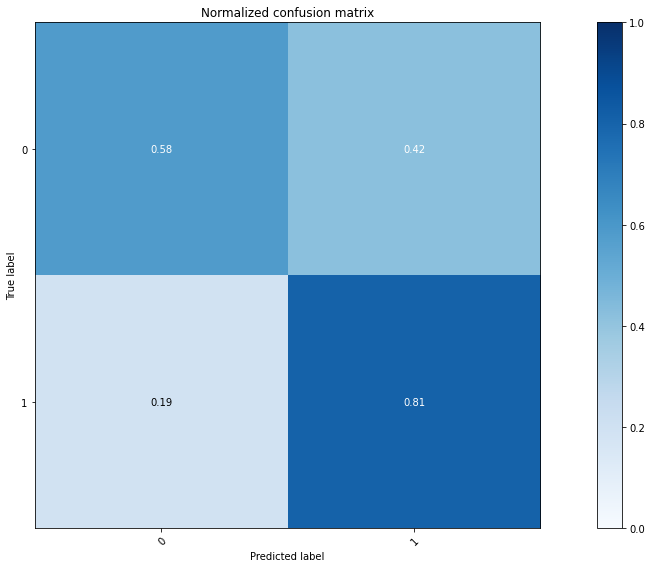

In [ ]:
plot_confusion_matrix(Ylabel_test_1, Ypredlabel_test_1, classes = classes, normalize = True, title = 'Normalized confusion matrix')
plt.show()

In [ ]:
cm_train_1 = confusion_matrix(Ylabel_train_1, Ypredlabel_train_1)
cm_test_1 = confusion_matrix(Ylabel_test_1, Ypredlabel_test_1)

In [ ]:
cm_train_1

array([[14126, 10020],
       [ 6740, 27473]])

In [ ]:
cm_test_1

array([[ 5983,  4319],
       [ 2860, 11977]])

In [ ]:
%%R
factor = data.frame(unique(cbind(offense_cut$OF_description, offense_cut$OF_category)))
colnames(factor) = c("JDOFND", "JDOFCT")
factor$JDOFND_f = as.integer( factor(x = factor$JDOFND, levels = sort(unique(factor$JDOFND))) )
factor$JDOFCT_f = as.integer( factor(x = factor$JDOFCT, levels = sort(unique(factor$JDOFCT))) )
write.csv(factor, "factor.csv", row.names = FALSE)

In [ ]:
import pandas as pd
factor = pd.read_csv('factor.csv')
factor

,JDOFND,JDOFCT,JDOFND_f,JDOFCT_f
0,RUNAWAY - IN COUNTY,CHINS,479,3
1,BURGLARY HABITATION,PROPERTY/FELONY,92,7
2,ASSAULT-FAMILY MEMBER,PERSON/MISD,41,6
3,TICKET ON MISDEMEANOR C,ADMINISTRATIVE,567,1
4,MARIJUANA USE - LESS THAN 2 OZ,ILLEGAL SUBSTANCE/F M,329,4
...,...,...,...,...
606,TAMPER W/CERT/INSP/MAINT REPOR,ALL OTHERS/F MAB,502,2
607,ONLINE HARAS W/ID INFO SOLICT,ALL OTHERS/F MAB,359,2
608,DWI W/ CHILD UNDER 15 YOA,ALL OTHERS/F MAB,168,2
609,CONSPIRACY/2ND DEGREE FELONY,ALL OTHERS/F MAB,118,2


In [ ]:
import datetime as dt
bd_entry = input('Enter the Birth Date in YYYY-MM-DD format: ')
IIBY___, IIBM___, IIBD___ = map(int, bd_entry.split('-'))
bd = dt.date(IIBY___, IIBM___, IIBD___)

gender_entry = input('Enter the Gender: ').lower()
while gender_entry != 'male' and gender_entry != 'female': 
  print('please type either male or female.')
  gender_entry = input('Enter the Gender (male or female): ').lower()
if gender_entry == 'male': 
  IIGE___ = 1
elif gender_entry == 'female':
  IIGE___ = 2

ethnicity_entry = input('Enter the Ethnicity: ').lower()
while ethnicity_entry != 'asian' and ethnicity_entry != 'black' and ethnicity_entry != 'hispanic' and ethnicity_entry != 'white':
  print('please type Asian, Black, Hispanic, or White.')
  ethnicity_entry = input('Enter the Ethnicity: ').lower()
if ethnicity_entry == 'asian':
  IIRA___ = 1
elif ethnicity_entry == 'black':
  IIRA___ = 2
elif ethnicity_entry == 'hispanic':
  IIRA___ = 3
elif ethnicity_entry == 'white':
  IIRA___ = 4

def age(start_date, end_date):
  start_date, end_date = str(start_date), str(end_date)
  strt_yr, strt_mth, strt_dy = map(int, start_date.split('-'))
  end_yr, end_mth, end_dy = map(int, end_date.split('-'))
  age = end_yr - strt_yr + list(map(lambda x: -1 if x < 0 else 0, [int("%02d" % end_mth + "%02d" % end_dy) - int("%02d" % strt_mth + "%02d" % strt_dy)]))[0]
  from datetime import datetime as dt
  try: 
    Age = age + ( dt.strptime(end_date, "%Y-%m-%d") - dt.strptime(f'{strt_yr + age}-{strt_mth}-{strt_dy}', "%Y-%m-%d") ).days / ((366 + 365 + 365 + 365) / 4)
  except:
    if strt_mth == 2 and strt_dy == 29:
      Age = age + ( dt.strptime(end_date, "%Y-%m-%d") - dt.strptime(f'{strt_yr + age}-02-28', "%Y-%m-%d") ).days / ((366 + 365 + 365 + 365) / 4)
    else:
      print('please enter a correct date!!!')
  return Age

import datetime as dt
OF_date_entry = input('Enter the Offense Date in YYYY-MM-DD format: ')
OF_yr, OF_mth, OF_dy = map(int, OF_date_entry.split('-'))
OF_date = dt.date(OF_yr, OF_mth, OF_dy)
JDOF_age = age(bd, OF_date)

JDOF_ordinal = int(input('Enter an ordinal number that the juvenile object committed the offense: '))
while JDOF_ordinal < 1:
  print("please type an integer number that is not less than 1.")
  JDOF_ordinal = int(input('Enter an ordinal number that the juvenile object committed the offense: '))

import pandas as pd
factor = pd.read_csv('factor.csv')

OFND_entry = input('Enter the description that new offense code categorized by severity: ').upper()
index = factor.index[ factor['JDOFND'] == OFND_entry ][0]
JDOFND, JDOFCT = factor['JDOFND_f'][index], factor['JDOFCT_f'][index]

OFSL_entry = int( input('Enter the degree of severity that new offense code categorized by severity: ') )
while OFSL_entry > 9 or OFSL_entry < 0: 
  print('please type an integer that in the range from 0 to 9.')
  OFSL_entry = int( input('Enter the degree of severity that new offense code categorized by severity: ') )
JDOFSL = OFSL_entry

JDDT_convict = input('Is the juvenile object imprisoned? ').lower()
while JDDT_convict != 'yes' and JDDT_convict != 'no': 
  print('please type either Yes or No.')
  JDDT_convict = input('Is the juvenile object imprisoned? ').lower()
if JDDT_convict == "yes": JDDT_convict = 1
elif JDDT_convict == "no": JDDT_convict = 0

from datetime import datetime as dt
if JDDT_convict == 0: 
  JDDT_duration = 0
elif JDDT_convict == 1:
  DT_enter = dt.strptime( input('Enter the date the juvenile object was placed in detention in YYYY-MM-DD format: '), "%Y-%m-%d" )
  DT_exit = dt.strptime( input('Enter the date the juvenile object was released from detention in YYYY-MM-DD format: '), "%Y-%m-%d" )
  JDDT_duration = (DT_exit - DT_enter).days

import datetime as dt
MY_date_entry = input('Enter Screening date or date the department attempted to administer or an assessment date for MAYSI-2 in YYYY-MM-DD format: ')
MY_yr, MY_mth, MY_dy = map(int, MY_date_entry.split('-'))
MY_date = dt.date(MY_yr, MY_mth, MY_dy)
JDMY_age = age(bd, MY_date)

JDMYA = input('Was the MAYSI-2 administered to the juvenile object? ').lower()
while JDMYA != 'yes' and JDMYA != 'no': 
  print('please type either Yes or No.')
  JDMYA = input('Is the juvenile object imprisoned? ').lower()
if JDMYA == "yes": JDMYA = 1
elif JDMYA == "no": JDMYA = 0

if bool(JDMYA) == True:
  JDMYAD = int(input('Enter the Alcohol/drug Use Score: '))
  JDMYAI = int(input('Enter the Angry-irritable Score: '))
  JDMYDA = int(input('Enter the Depressed-anxiety Score: '))
  JDMYSC = int(input('Enter the Somatic Complaints Score: '))
  JDMYSI = int(input('Enter the Suicide Ideation Score: '))
  JDMYTD = int(input('Enter the Thought Disturbance Boys Score: '))
  JDMYTE = int(input('Enter the Traumatic Experiences Score: '))
elif bool(JDMYA) == False:
  JDMYAD, JDMYAI, JDMYDA, JDMYSC, JDMYSI, JDMYTD, JDMYTE = -1, -1, -1, -1, -1, -1, -1

Enter the Birth Date in YYYY-MM-DD format: 2001-01-01
Enter the Gender: Male
Enter the Ethnicity: Asian
Enter the Offense Date in YYYY-MM-DD format: 2016-02-06
Enter an ordinal number that the juvenile object committed the offense: 1
Enter the description that new offense code categorized by severity: MURDER
Enter the degree of severity that new offense code categorized by severity: 9
Is the juvenile object imprisoned? Yes
Enter the date the juvenile object was placed in detention in YYYY-MM-DD format: 2016-02-07
Enter the date the juvenile object was released from detention in YYYY-MM-DD format: 2018-12-1
Enter Screening date or date the department attempted to administer or an assessment date for MAYSI-2 in YYYY-MM-DD format: 2016-03-04
Was the MAYSI-2 administered to the juvenile object? Yes
Enter the Alcohol/drug Use Score: 5
Enter the Angry-irritable Score: 4
Enter the Depressed-anxiety Score: 3
Enter the Somatic Complaints Score: 2
Enter the Suicide Ideation Score: 1
Enter the Th

In [ ]:
import numpy as np
import pandas as pd
input = np.array([IIBY___, IIBM___, IIBD___, IIGE___, IIRA___, JDOF_age, JDOFND, JDOFCT,
                  JDOFSL, JDOF_ordinal, JDDT_convict, JDDT_duration, 
                  JDMYA, JDMY_age, JDMYAD, JDMYAI, JDMYDA, JDMYSC, JDMYSI, JDMYTD, JDMYTE])
input = input.reshape(1, input.shape[0])
INPUT = pd.DataFrame(data = input, 
                     columns = ['IIBY___', 'IIBM___', 'IIBD___', 'IIGE___', 'IIRA___', 'JDOF_age', 
                                'JDOFND', 'JDOFCT', 'JDOFSL', 'JDOF_ordinal', 'JDDT_convict', 
                                'JDDT_duration', 'JDMYA', 'JDMY_age', 'JDMYAD', 'JDMYAI', 'JDMYDA', 
                                'JDMYSC', 'JDMYSI', 'JDMYTD', 'JDMYTE'], index = ['input'])

In [ ]:
pd.DataFrame(data = INPUT.loc[:, 'IIBY___' : 'IIRA___'], 
             columns = ['IIBY___', 'IIBM___', 'IIBD___', 'IIGE___', 'IIRA___'], 
             index = ['input'])

,IIBY___,IIBM___,IIBD___,IIGE___,IIRA___
input,2001.0,1.0,1.0,1.0,1.0


In [ ]:
pd.DataFrame(data = INPUT.loc[:, 'JDOF_age' : 'JDDT_duration'], 
             columns = ['JDOF_age', 'JDOFND', 'JDOFCT', 'JDOFSL', 
                        'JDOF_ordinal', 'JDDT_convict', 'JDDT_duration'], 
             index = ['input'])

,JDOF_age,JDOFND,JDOFCT,JDOFSL,JDOF_ordinal,JDDT_convict,JDDT_duration
input,15.098563,350.0,5.0,9.0,1.0,1.0,1028.0


In [ ]:
pd.DataFrame(data = INPUT.loc[:, 'JDMYA' : 'JDMYTE'], 
             columns = ['JDMYA', 'JDMY_age', 'JDMYAD', 'JDMYAI', 
                        'JDMYDA', 'JDMYSC', 'JDMYSI', 'JDMYTD', 'JDMYTE'], 
             index = ['input'])

,JDMYA,JDMY_age,JDMYAD,JDMYAI,JDMYDA,JDMYSC,JDMYSI,JDMYTD,JDMYTE
input,1.0,15.172485,5.0,4.0,3.0,2.0,1.0,0.0,0.0


In [ ]:
os.chdir('/content/drive/MyDrive/math 6315/Datasets/' + 'best_model_20210723-223457/')
from tensorflow.keras.models import load_model
trained_model_1 = load_model(base_folder_1)
predict = pd.DataFrame(
    data = trained_model_1.predict(input), 
    columns = ['Yep', 'Nope'], 
    index = ['Probability'])
#predict = pd.DataFrame(data = trained_model_1.predict(np.array(X_train.iloc[1, ]).reshape(1, X_train.shape[1])), columns = ['Yep', 'Nope'], index = ['Probability'])
predict

,Yep,Nope
Probability,0.286576,0.713424
